In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [4]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [5]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

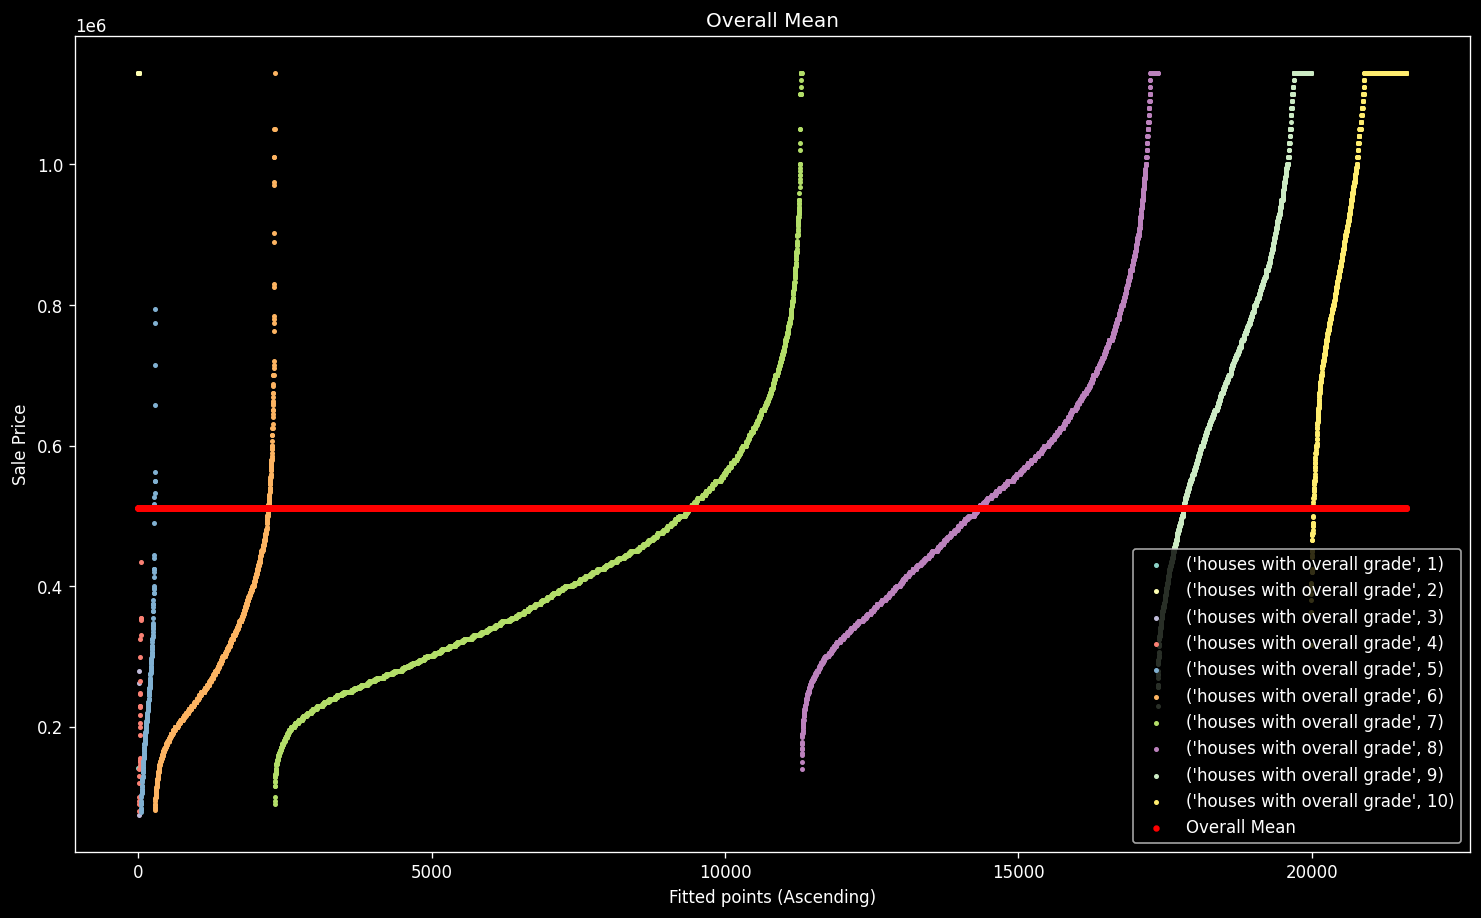

In [6]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # plotting
  plt.scatter( points, # x-axis
              np.sort(gradewise_list[i-1], axis = 0) , # y-axis
              label = ('houses with overall grade', i), s = 4 )            
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 8)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

In [7]:
grades_mean = data.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
  
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

NameError: name 'classwise_list' is not defined

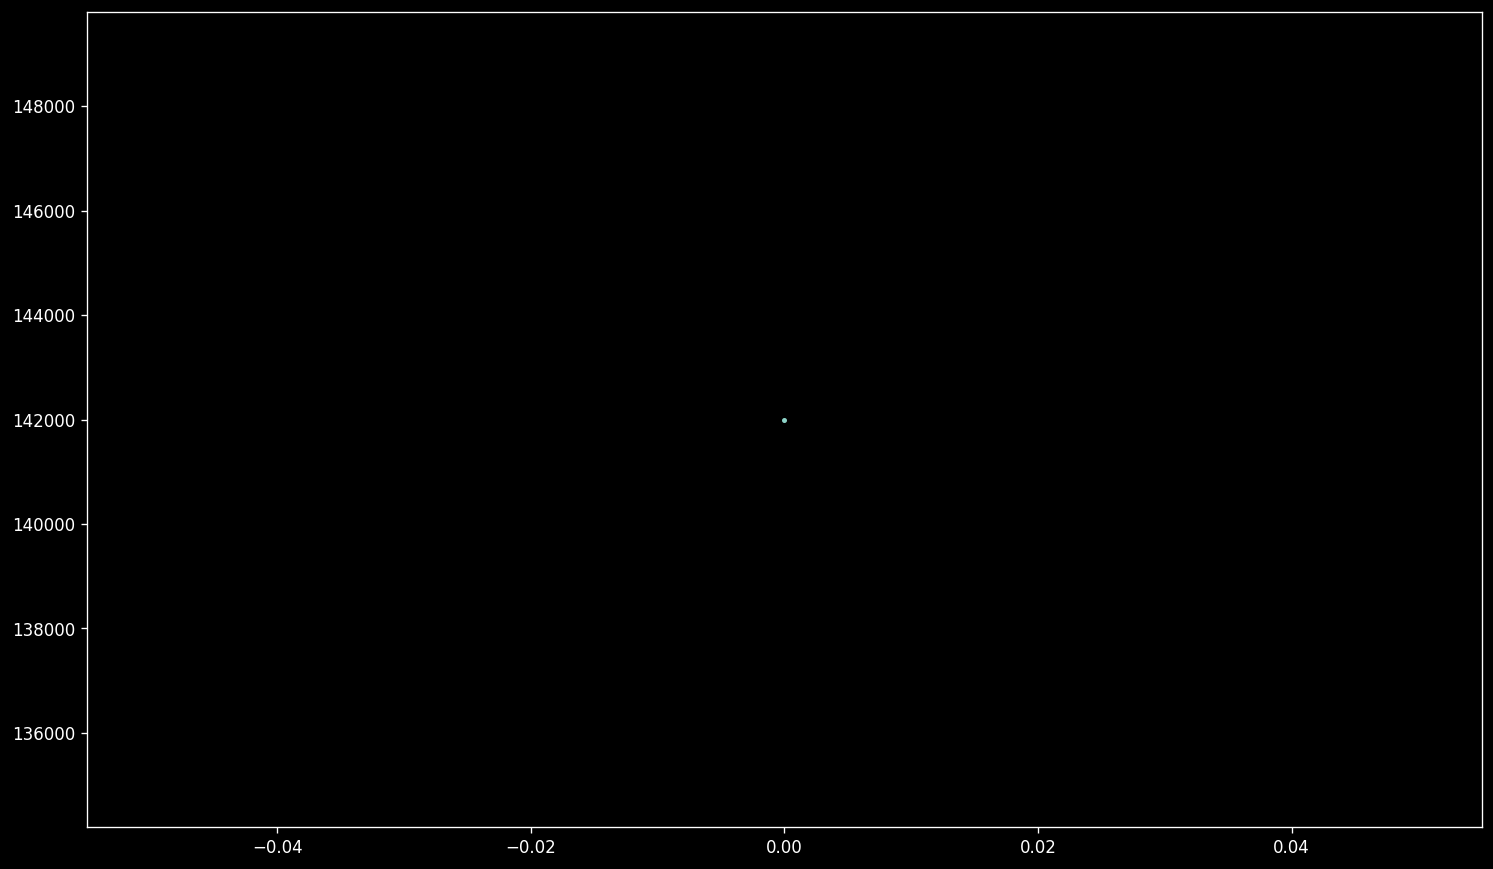

In [9]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

In [10]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

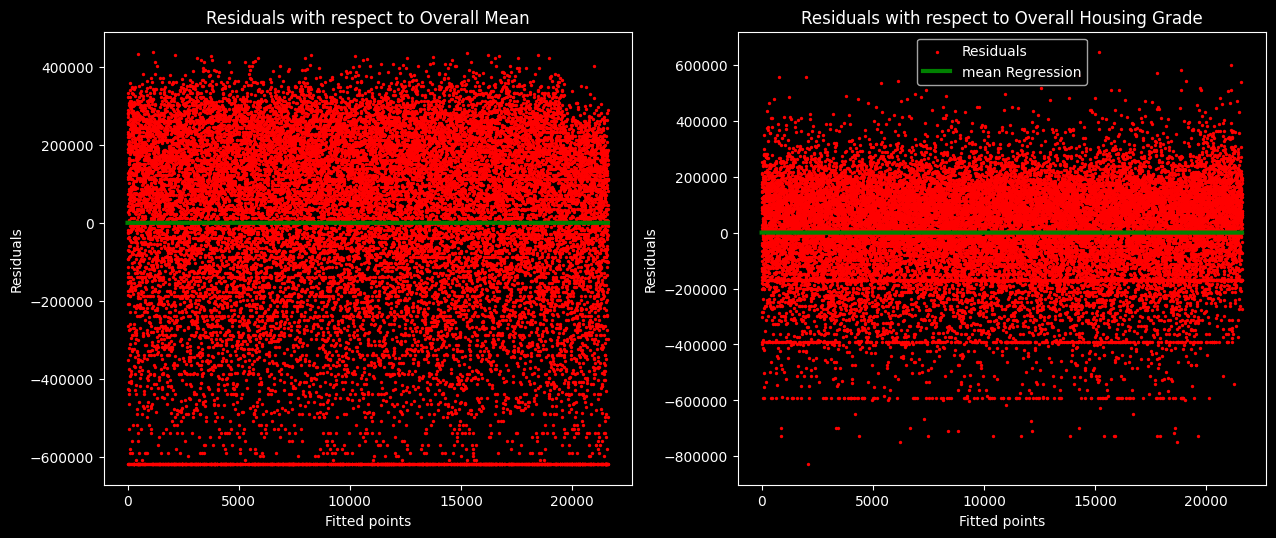

In [11]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [12]:
mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

0.0


In [13]:
Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [14]:
mean_absolute_error1 = sum(abs(Y_hat1 - Y))/n
mean_absolute_error1

199168.78146839526

In [15]:
mean_absolute_error2 = sum(abs(Y_hat2 - Y))/n
mean_absolute_error2

137081.70298203363

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_2 = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_2

137081.7029820291

In [17]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error(Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

In [18]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

In [19]:
Y = data["Sale_Price"]
Y_bar = data["mean_sales"]
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [20]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean

62528116847.799576

In [21]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model

30804835720.342426

In [22]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [23]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836